<h1>Feature selection methods</h1>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

real_estate_df = pd.read_csv('../datasets/real_estate_data.csv')
real_estate_df.head()

Unnamed: 0  house_age  dist_nStation  num_cStores  dist_nStation.1  \
0           0       32.0       84.87882           10         84.87882   
1           1       19.5      306.59470            9        306.59470   
2           2       13.3      561.98450            5        561.98450   
3           3       13.3      561.98450            5        561.98450   
4           4        5.0      390.56840            5        390.56840   

        lat       long  house_p  
0  24.98298  121.54024   3221.5  
1  24.98034  121.53951   3587.0  
2  24.98746  121.54391   4020.5  
3  24.98746  121.54391   4658.0  
4  24.97937  121.54245   3663.5

In [2]:
X_re = real_estate_df.iloc[:,0:-1] #fetch the features
y_re = real_estate_df.iloc[:,[-1]] #fetch the target variable

<b>Classification dataset</b>: 

Data Set Information:

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver

In [3]:
driver_df = pd.read_csv('../datasets/in-vehicle-coupon-recommendation.csv')
driver_df.info()

X_dr = driver_df.iloc[:,0:25]
y_dr = driver_df.iloc[:,[-1]]

driver_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

<h2>Filter-based feature selection</h2>

<h3>1. Pearson correlation</h3>

Pearson correlation $r$ is a coefficient that measures the linear relationship between two continuous variables.

$$ corr(x,y) =  \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

$$ -1\leq corr(x,y) \leq 1$$

In [6]:
from sklearn.feature_selection import r_regression

N_f = len(X_re.columns)

r_coefs = r_regression(X_re,y_re)#compute the pearson correlation for each feature
print(X_re.columns[1])
r_dict = {}
for i in range(N_f):
    r_dict[X_re.columns[i]] = [r_coefs[i]]

r_coefs_df = pd.DataFrame(r_dict)
r_coefs_df.head()

house_age


Unnamed: 0  house_age  dist_nStation  num_cStores  dist_nStation.1  \
0   -0.028587  -0.210567      -0.673613     0.571005        -0.673613   

        lat      long  
0  0.546307  0.523287

The results show that the unnamed variable "<b>Unnamed</b>" is poorly corrected with the target variable and thus could be pruned.

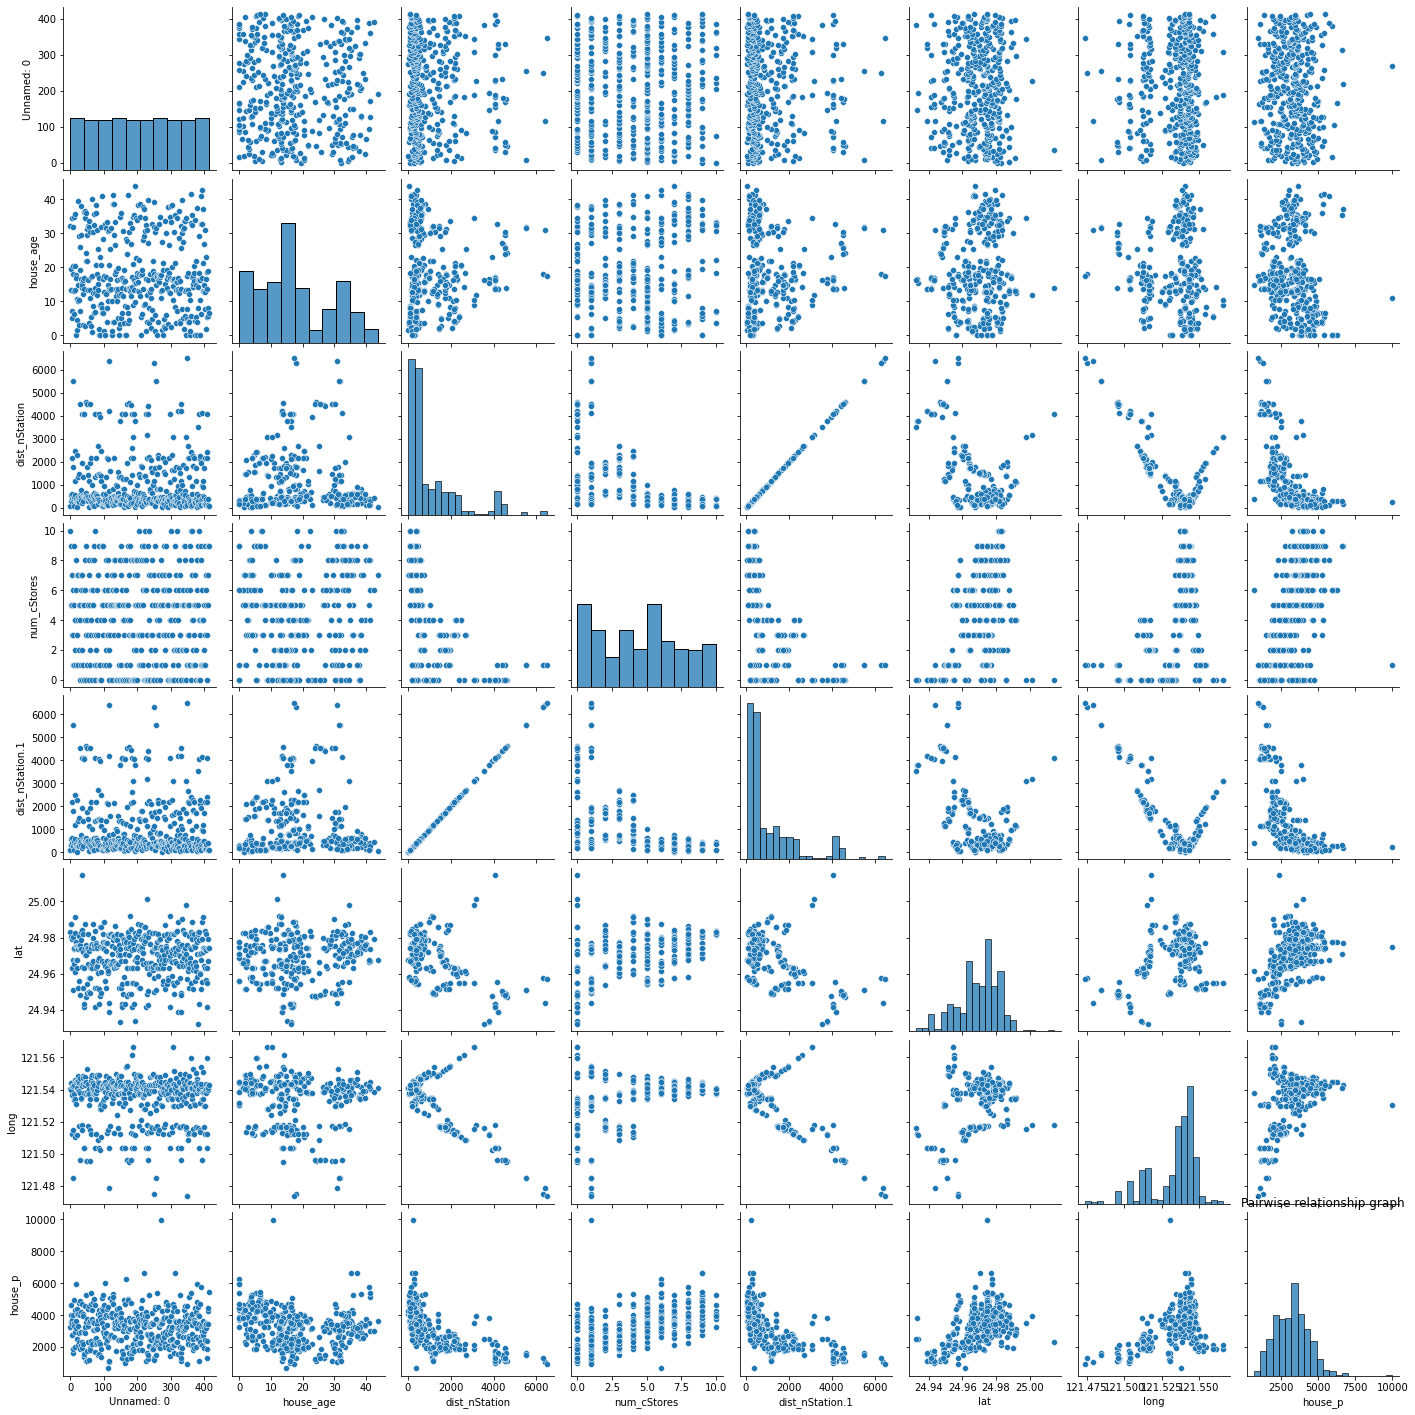

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(real_estate_df)
plt.title('Pairwise relationship graph')
plt.show()


<h3>2. Mutual Information</h3>


Mutual information is a ranking score that assess the existence of a nonlinear relationship between two variables. It is based on information theory. It can be used for both real valued and categorical variables.

$$I(X;Y) = \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log\left(\frac{p(x, y)}{p(x)p(y)}\right)
$$

$$I(X;Y) \geq 0$$

In [19]:
from sklearn.feature_selection import mutual_info_regression

N_f = len(X_re.columns)

m_coefs = mutual_info_regression(X_re,y_re)#compute the mutual information for each feature against the target
m_dict = {}
for i in range(N_f):
    m_dict[X_re.columns[i]] = [m_coefs[i]]

m_coefs_df = pd.DataFrame(m_dict)
m_coefs_df.head()

Unnamed: 0  house_age  dist_nStation  num_cStores  dist_nStation.1  \
0    0.004483   0.323068       0.636439     0.390978         0.634596   

        lat      long  
0  0.547608  0.657141

<h4>Discoverying nonlinearity relationship with Mutual information</h4>

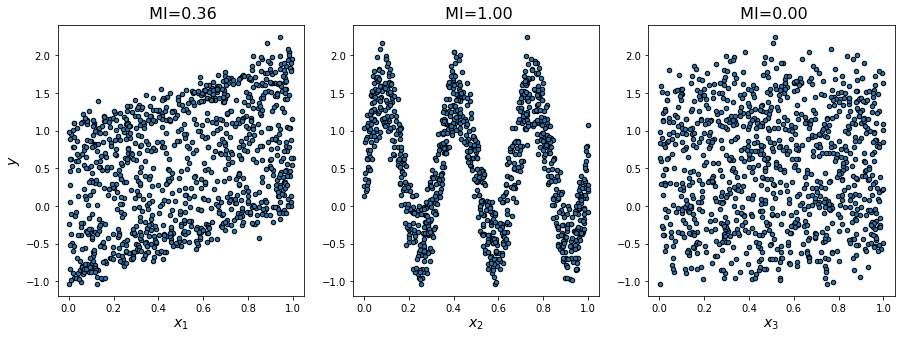

In [22]:
import numpy as np

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title(" MI={:.2f}".format(mi[i]), fontsize=16)
plt.show()

<h3>3. Chi Square - $\chi^2$</h3>

The Chi square is a statistical test that verifies the dependency between two categorical variables.

$$ 
\chi^2 = \sum_{}^{}\frac{(O_i-E_i)^2}{E_i}
$$

<h2>Wrapper Methods</h2>

Wrapper-based methods are feature selection methods that uses the model in the loop while searching for the optimal feature subset